# 3: Linear regression - Cost function Intuition considering $\theta_0$ and $\theta_1 $

Last time we assumed $\theta_0 =0$ and we have intuitioned the behaviour of $\theta_1$.

Now let's consider both $\theta_0$ and $\theta_1 $.

## Recap

Here is the **recap** from L1: Linear regression - introduction

**Simple linear function**: $ y = f(x) $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (1)

**Hypothesis**: $ h_\theta(x) = \theta_0 + \theta_1 x$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (2)

**Error function**: Choose $min(\theta_i)$ such that  $(h_\theta(x) - y) \simeq 0 $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (3)

**Cost Function**: $  \underset {\theta_0, \theta_1} {minium} = J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2 $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (4)

**Minimised Cost Function**: $  \underset {\theta_0, \theta_1} {minium}$ $J(\theta_0, \theta_1)$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (5)

The **GOAL** of the linear regression is to choose the value of the **parameters** $\theta_0$ and $\theta_1$ that minimises the finction $J(\theta_0, \theta_1)$. Hence by finding the $J(\theta_0, \theta_1)$ **miminum** results in **best straight line regression line** for the given training set.


In [95]:
%%html
<style>
table {float:left}
</style>


## Behaviour of cost function

Let's understand the behaviour of the ** cost function** $J(\theta_0, \theta_1)$ as in eq: 4 on **Profit** vs **Population of the city** data as below:

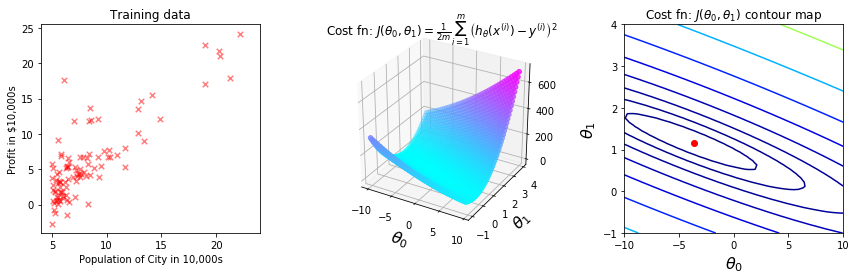

In [96]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

data = np.loadtxt('../data/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return(J)

# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax1.scatter(X[:,1], y, s=30, c='r', marker='x', alpha=0.5)
ax1.set_xlim(4,24)
ax1.set_xlabel('Population of City in 10,000s')
ax1.set_ylabel('Profit in $10,000s');
ax1.set_title('Training data')

ax2 = fig.add_subplot(132, projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(X,y,np.array([[david], [kaleko]])))

scat = ax2.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('cool'))
ax2.set_xlabel(r'$\theta_0$',fontsize=16)
ax2.set_ylabel(r'$\theta_1$',fontsize=16)
ax2.set_title(r'Cost fn: $J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2 $',fontsize=12)

ax3 = fig.add_subplot(133)
ax3.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax3.scatter(theta[0],theta[1], c='r')
ax3.set_xlabel(r'$\theta_0$',fontsize=16)
ax3.set_ylabel(r'$\theta_1$',fontsize=16)
ax3.set_title(r'Cost fn: $J(\theta_0, \theta_1)$ contour map',fontsize=12)

fig.tight_layout() # Adjust spaces between diffrent axes automatically
plt.show()    


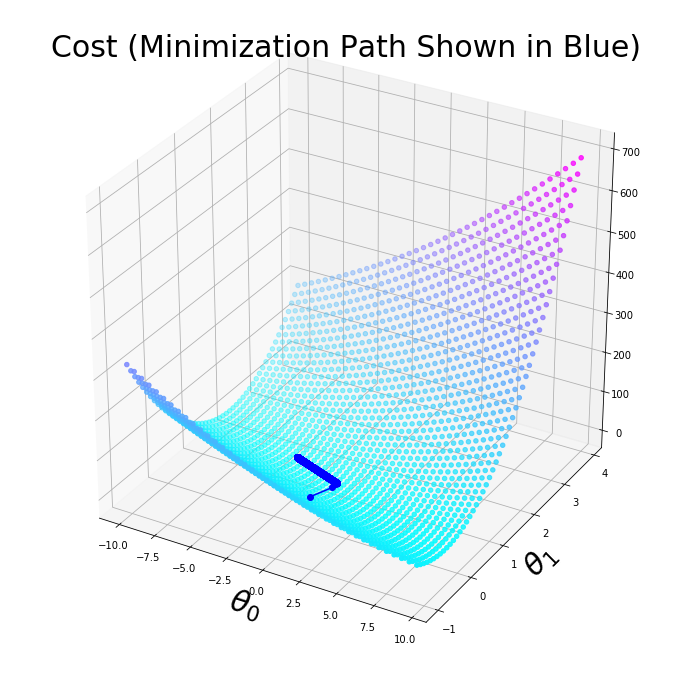

In [124]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

datafile = '../data/ex1data1.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True) #Read in comma separated data
#Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)


iterations = 1500
alpha = 0.01

def computeCost(mytheta,X,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

#Test that running computeCost with 0's as theta returns 32.07:

initial_theta = np.zeros((X.shape[1],1)) #(theta is a vector with n rows and 1 columns (if X has n features) )

#Actual gradient descent minimizing routine
def descendGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        # Buggy line
        #thetahistory.append(list(tmptheta))
        # Fixed line
        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

#Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('cool'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()


Suppose, select a few points on the **Plot 2 cost function** above, for example, **p1** where $\theta_1 = 0.24$ and plotting **hypothesis** $h_\theta(x)$ using the equation as in 6 results in the **plot 3**. Here the **hypothesis** barely fits the points resulting in wide error between **actual** and **predicted** values.

The reuslt will be same if we select the point **p3** where $\theta_1 = 1.84$. 

If we select the point **p2**, where $\theta_1 = 1$ which is nothing but the **minimum** value of the cost function $J(\theta_1)$ and plotting **hypothesis** $h_\theta(x)$ using the equation as in 6 results in the **plot 4**. The **hypothesis** results in minimum error between **actual** and **predicted** values.

With this, we can say that we get the **best** **hypothesis** $h_\theta(x)$ if we get $\theta_1$ at **minimum** $J(\theta_1)$.

<span style="color:#FF0000">**The process of finding the $\theta_1$ parameter at **minimum** $J(\theta_1)$ is called Gradient Descent**</span>

In [10]:

%matplotlib inline
#%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))


#### Overview
Linear Reg


In [3]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')

In [4]:
x = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]


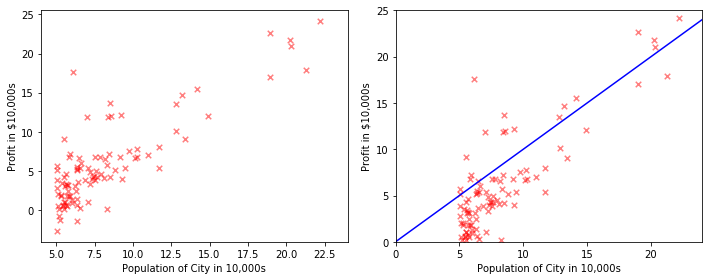

In [5]:
fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot2grid((1,8), (0,0), colspan=4)
ax1.scatter(x[:,1], y, s=30, c='r', marker='x', alpha=0.5, linewidths=1)
ax1.set_xlim(4,24)
ax1.set_xlabel('Population of City in 10,000s')
ax1.set_ylabel('Profit in $10,000s');
ax2 = plt.subplot2grid((1,8), (0,4), colspan=4)
ax2.scatter(x[:,1], y, s=30, c='r', marker='x', alpha=0.5, linewidths=1)
ax2.set_xlim(0,24)
ax2.set_ylim(0,25)
ax2.set_xlabel('Population of City in 10,000s')
ax2.set_ylabel('Profit in $10,000s');

x1 = np.linspace(0, 30, 20)
y1 = x1
ax2.plot(x1,y1, color='b')

fig.tight_layout()
plt.show() 

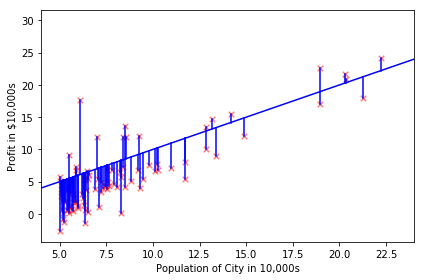

In [12]:
fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot2grid((1,4), (0,0), colspan=4)
ax1.scatter(x[:,1], y, s=30, c='r', marker='x', alpha=0.5, linewidths=1)
ax1.set_xlim(4,24)
ax1.set_xlabel('Population of City in 10,000s')
ax1.set_ylabel('Profit in $10,000s');
x1 = np.linspace(0, 30, 20)
y1 = x1
ax1.plot(x1,y1, color='b')

sdx = x[:,1]

#print(sdx)

for i, val in  enumerate(sdx):
    sx = val
    sy = y[i]
    
    lx = sx
    ly = lx
    lnp = np.linspace(ly,sy, 5)
    #print(lnp)
    ax1.plot([lx, lx, lx, lx,lx],lnp, color='b')
    

fig.tight_layout()
plt.show() 

## 2.2 Gradient Descent
Fit the linear regression parameters $\,\theta \,$ to the dataset using gradient descent equation:

$ J(\theta) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m} (h_\theta (x) - y)^2 \,\,\, where \,\,\, h_\theta (x) = \theta_0 + \theta_1 x $

Assuming, $\,\, \theta_0=0 \,\, $ which is nothing but the fit line passes through the origin:

$h_\theta (x) = \theta_1 x $

Substituting the $\,\,h_\theta (x)\,\,$, in the equation 1:

$ J(\theta) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m} (\theta_1 x  - y)^2$


In [13]:
def computeCost(x, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = x.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    #print(m)
    return(J)

In [14]:
computeCost(x,y)

32.072733877455676

In [15]:
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))


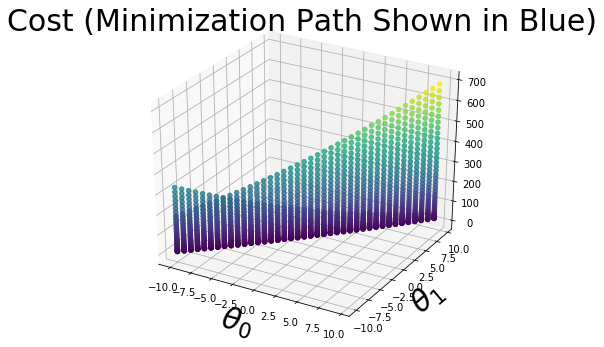

In [16]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(x,y,np.array([[david], [kaleko]])))

scat = ax.scatter(myxs,myxs,myzs,c=np.abs(myzs), alpha=0.8)

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
#plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()